
# **Real Estate Price Prediction**
With this jupyter notebook, I would like to check if it is possible to predict real estate prices using Regression (Linear Regression, to be precise) knowing certain features of the real estate.

First, let's import the needed libraries and the dataset which can be found here: https://www.kaggle.com/davivieirab/real-estate-data-brazil

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
filepath = os.getcwd()+os.sep+'real_estate_kaggle.csv'
df = pd.read_csv(filepath)

Now lets perform a basic exploratory data analysis.

In [3]:
print(df.shape)
print(df.head())
print(df.columns)

(17341, 8)
   Unnamed: 0   area rooms suites bathrooms parkings      price neighborhood
0           1  230.0     3      3         5        3  3790000.0           JA
1           2   85.0     2      1         2        1  1390000.0           JA
2           3  136.0     3      1         3        1  1590000.0           JA
3           4  136.0     3      1         4        1  1500000.0           JA
4           5  310.0     3      1         4        2  4150000.0           JA
Index(['Unnamed: 0', 'area', 'rooms', 'suites', 'bathrooms', 'parkings',
       'price', 'neighborhood'],
      dtype='object')


So the dataset has 17.341 samples.

By simply taking a look at the features, we can see that there is one, called "Unnamed: 0" that contains the samples' IDs and can therefore be deleted.

In [4]:
del df['Unnamed: 0']

We are also able to see that all the features should all be integers, except the one called "neighborhood" which should clearly be a string. Let's see if that is the case.

In [5]:
print(df.dtypes)

area            float64
rooms            object
suites           object
bathrooms        object
parkings         object
price           float64
neighborhood     object
dtype: object


Apparently, the columns "rooms", "suites", "bathrooms" and "parkings" have been read by pandas as string, so they must be transformed into integers.

In [6]:
df['rooms'].unique()

array(['3', '2', '4', '1', '5', '6', nan, '--'], dtype=object)

In [7]:
df['suites'].unique()

array(['3', '1', '--', '2', '4', '5', '10', '20', '12', '6', '34'],
      dtype=object)

In [8]:
df['bathrooms'].unique()

array(['5', '2', '3', '4', '1', '6', '7', '--', '8', '10', '9', '11'],
      dtype=object)

In [9]:
df['parkings'].unique()

array(['3', '1', '2', '--', '4', '8', '5', '6', '10', '7', '11', '12',
       '9'], dtype=object)

In all the 4 columns, we can see that the value "0" has been replaced with "--" which is what prevented pandas from importing the colums correctly. There is also a NaN value in the "rooms" column. Let's fix this.

In [10]:
cols = ['rooms','suites','bathrooms','parkings']
for col in cols:
      df[col]=df[col].str.replace("--","0")

In [11]:
df['rooms'].fillna(0, inplace=True)

Now it should be possible to transform those fields from strings to integers

In [12]:
for col in cols:
      df[col]=df[col].astype(int)

In [13]:
print(df.dtypes)

area            float64
rooms             int64
suites            int64
bathrooms         int64
parkings          int64
price           float64
neighborhood     object
dtype: object


Now we can also expect the function "describe" to work properly. Let's also check for null values.

In [14]:
df.describe()

,area,rooms,suites,bathrooms,parkings,price
count,17338.000000,17341.000000,17341.000000,17341.000000,17341.000000,1.734100e+04
mean,193.843696,2.962517,1.599965,3.281126,1.981028,2.609121e+06
std,106.801935,0.793778,1.194131,1.415406,1.254306,2.295376e+06
min,20.000000,0.000000,0.000000,0.000000,0.000000,3.200000e+04
25%,120.000000,3.000000,1.000000,2.000000,1.000000,1.300000e+06
50%,175.000000,3.000000,1.000000,3.000000,2.000000,1.950000e+06
75%,240.000000,3.000000,2.000000,4.000000,3.000000,3.150000e+06
max,1200.000000,6.000000,34.000000,11.000000,12.000000,3.900000e+07


In [15]:
df.isna().any()

area             True
rooms           False
suites          False
bathrooms       False
parkings        False
price           False
neighborhood    False
dtype: bool

Apparently there are null values in the "area" column. If it would have been any other numeric feature, we could have inferred that the null values could be zeroes but unfortunately we cannot do the same for the "area" attribute.

In [16]:
df[df['area'].isna()]

,area,rooms,suites,bathrooms,parkings,price,neighborhood
6511,NaN,3,1,2,2,2390000.0,JA
7282,NaN,4,1,4,7,1810000.0,JA
16848,NaN,2,0,2,1,640000.0,JP


It actually looks like an error in the web scraping process. We have to drop those records.

In [17]:
df.dropna(inplace=True)
df.shape

(17338, 7)

After dropping those 3 records, let's take a look at the correlation between the price and the other features

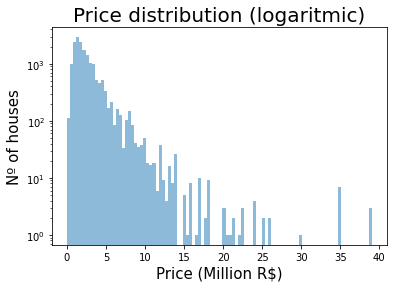

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

price = df['price'].sort_values()/1e6
plt.hist(price, log=True, alpha=0.5, bins=100)
plt.title('Price distribution (logaritmic)', fontsize=20)
plt.xlabel('Price (Million R$)', fontsize=15)
plt.ylabel('Nº of houses', fontsize=15)
plt.show()

We can see that most of the houses have a price closer to the minimum.

There supposedly is a close correlation between the house price and its area.

In [19]:
df.corr()['price']

area         0.841147
rooms        0.499696
suites       0.614119
bathrooms    0.540410
parkings     0.763911
price        1.000000
Name: price, dtype: float64

As expected, the area and price features are highly correlated. Let's visualize it.

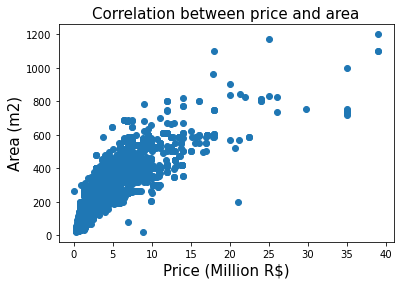

In [20]:
plt.scatter(df['price']/1e6,df['area'])
plt.title("Correlation between price and area", fontsize=15)
plt.xlabel('Price (Million R$)', fontsize=15)
plt.ylabel('Area (m2)', fontsize=15)
plt.show()

We can confirm that there is a clear correlation. Still we might compare the price per square meters with the area to see if there are outliers since, to a certain extent, there should be a slight correlation between the price per square meter and the size of the house (bigger houses tend to have a higher cost per square meter).


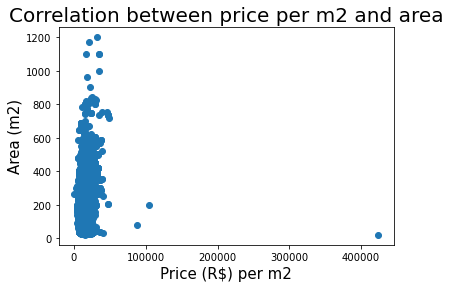

In [21]:
df['price_per_m2'] = df['price']/df['area']
plt.scatter(df['price_per_m2'],df['area'])
plt.title("Correlation between price per m2 and area", fontsize=20)
plt.xlabel('Price (R$) per m2', fontsize=15)
plt.ylabel('Area (m2)', fontsize=15)
plt.show()

We can clearly see that there are 3 houses that have a surprisingly high price per square meter considering how small they are.

In [22]:
df.sort_values(by='price_per_m2', ascending=False).head(3)

,area,rooms,suites,bathrooms,parkings,price,neighborhood,price_per_m2
10575,21.0,4,4,5,8,8900000.0,JP,423809.52381
17087,200.0,3,1,2,2,21000000.0,JP,105000.00000
5765,80.0,3,1,2,5,7000000.0,JA,87500.00000


Those 3 houses are clearly outliers, probably dued to errors with the web scraping. Let's drop them out.

In [23]:
for i in range(0,3):
  index_to_drop = df[df['price_per_m2']==df['price_per_m2'].max()].index
  df = df.drop(index_to_drop)

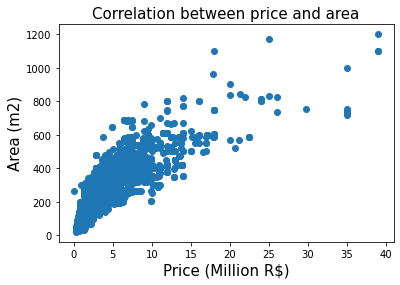

In [24]:
plt.scatter(df['price']/1e6,df['area'])
plt.title("Correlation between price and area", fontsize=15)
plt.xlabel('Price (Million R$)', fontsize=15)
plt.ylabel('Area (m2)', fontsize=15)
plt.show()

It looks like there is another outlier, this time with a price per square meter that is too low. Let's check the features of that house.

In [25]:
df[df['price_per_m2']==df['price_per_m2'].min()]

,area,rooms,suites,bathrooms,parkings,price,neighborhood,price_per_m2
10442,263.0,4,4,5,4,32000.0,JP,121.673004


This huge difference between the area and the price of this sample, could probably dued to the fact that the house might need reform. Since we do not have that information, we cannot use this sample.

In [26]:
index_to_drop = df[df['price_per_m2']==df['price_per_m2'].min()].index
df = df.drop(index_to_drop)

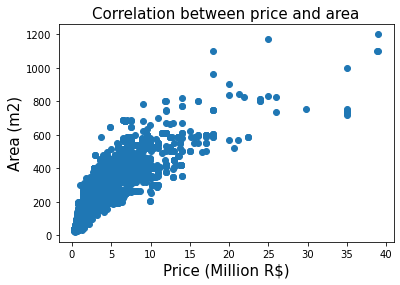

In [27]:
plt.scatter(df['price']/1e6,df['area'])
plt.title("Correlation between price and area", fontsize=15)
plt.xlabel('Price (Million R$)', fontsize=15)
plt.ylabel('Area (m2)', fontsize=15)
plt.show()

Before applying any regression algoritm, lets look if there is a graphically visible difference between the two neighborhoods.

In [28]:
df_JA = df[df['neighborhood']=='JA']
df_JP = df[df['neighborhood']=='JP']

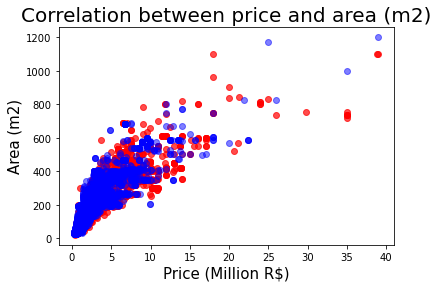

In [29]:
plt.scatter(df_JA['price']/1e6,df_JA['area'],color='red', alpha=0.7)
plt.scatter(df_JP['price']/1e6,df_JP['area'],color='blue', alpha=0.5)
plt.title("Correlation between price and area (m2)", fontsize=20)
plt.xlabel('Price (Million R$)', fontsize=15)
plt.ylabel('Area (m2)', fontsize=15)
plt.show()

It actually does not look like there is a big difference between the two neighborhoods.

Let's try to predict prices with the Linear Regression algoritm.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

cols=['area','rooms','suites','bathrooms','parkings']

Test size is set to 0.30, so the model will try to use the 70% of the dataset to predict the price of the remaining 30% of the samples.

In [31]:
def linear_regression(df):
    
    X_train, X_test, y_train, y_test = train_test_split(df[cols], df['price'], test_size = .30, random_state = 5)
    
    regr = LinearRegression()
    regr.fit(X=X_train, y=y_train)
    
    y_pred = regr.predict(X_test)
    
    print('Average house price: '+str(df['price'].mean()))
    print('Root mean squared error: '+str(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('Mean absolute error: '+str(mean_absolute_error(y_test, y_pred)))
    print('Coefficient of determination (accuracy): '+str(r2_score(y_test, y_pred)))
    newdf = pd.DataFrame({'real_price':y_test,'price_pred':y_pred})
    newdf = newdf.sort_values('real_price').reset_index()
    plt.plot(newdf['real_price']/1e6,color='red',alpha=0.7)
    plt.plot(newdf['price_pred']/1e6,color='blue',alpha=0.4)
    plt.title('Real price vs. Price prediction', fontsize=20)
    plt.ylabel('Price (Million R$)', fontsize=15)
    plt.yticks([x for x in range(0,45,5)])
    plt.legend(['Real price','Price prediction'], fontsize=15)
    plt.show()

The model will show results for the whole dataset as well as results for the two neigborhood.

Results for Jardin América neighborhood
Average house price: 2965414.6603599447
Root mean squared error: 1053227.8560118817
Mean absolute error: 683134.3876375926
Coefficient of determination (accuracy): 0.7963995438182939


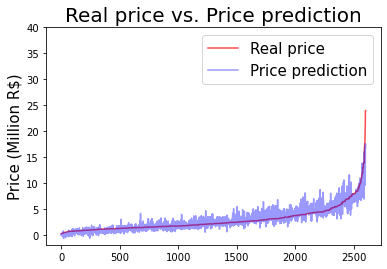



Results for Jardin Paulista neighborhood
Average house price: 2250032.8840295407
Root mean squared error: 825818.069603029
Mean absolute error: 499149.4257445683
Coefficient of determination (accuracy): 0.7803804617526119


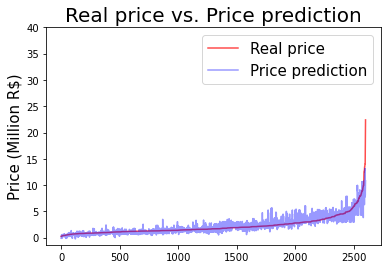



Results for the whole dataset
Average house price: 2607765.0426329756
Root mean squared error: 1154273.5816160021
Mean absolute error: 604374.1203563986
Coefficient of determination (accuracy): 0.7683205952445108


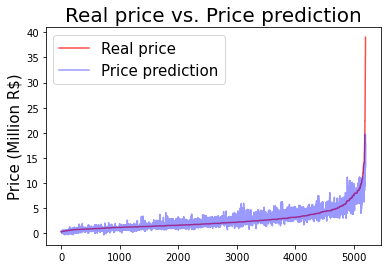

In [32]:
print("Results for Jardin América neighborhood")
linear_regression(df_JA)
print("\n")
print("Results for Jardin Paulista neighborhood")
linear_regression(df_JP)
print("\n")
print("Results for the whole dataset")
linear_regression(df)

The RMSE and MAE are quite high if we compare them with the average house price, which means that this model is not precise enough. Still, a coefficent of determination (R2) of 77% when applying the linear regression can tell us that this is possible and can be improved.
Two ways of improving this model could be:


*   Gather more information about the houses, such as the type of house, the year it was built, if it need reform, etc;
*   Use a more advanced regression algorithm.


